<a href="https://colab.research.google.com/github/VGGatGitHub/CohortProject_2020_week1/blob/master/Task2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task #2

A template code for training an RBM on Rydberg atom data (the full dataset) is provided below. For the first part of this task (determining the minimum number of hidden units), start with 20 hidden units. 

Imports and loadining in data:

In [2]:
! git clone https://github.com/VGGatGitHub/CohortProject_2020_week1.git

Cloning into 'CohortProject_2020_week1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 726 (delta 0), reused 0 (delta 0), pack-reused 723
Receiving objects: 100% (726/726), 19.40 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (393/393), done.


In [3]:
!pwd
!ls
f_loc="/content/CohortProject_2020_week1/Project_1_RBM_and_Tomography/"

/content
CohortProject_2020_week1  sample_data


In [4]:
import sys
sys.path.append(f_loc)

import os
print(os.getcwd())

for dirname, _, filenames in os.walk(f_loc):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass


/content


In [5]:
import numpy as np
import torch
from RBM_helper import RBM
import time

In [6]:
if torch.cuda.is_available():
    gpu = True
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    gpu = False
    device = torch.device("cpu")
    print("Running on the CPU")

#VGG check out 
# https://github.com/PIQuIL/QuCumber/blob/master/qucumber/rbm/binary_rbm.py
# https://pytorch.org/docs/stable/notes/cuda.html

Running on the GPU


In [7]:
import Rydberg_energy_calculator
all_data=np.loadtxt(f_loc+"Rydberg_data.txt")
all_data.shape

(20000, 100)

In [8]:
training_data = torch.from_numpy(all_data[0:1000,:]).cuda()
print(training_data.detach().shape)
training_data[2,:]

torch.Size([1000, 100])


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       dtype=torch.float64)

Define the RBM:

In [9]:
n_vis = all_data.shape[1]
n_hin = 1

rbm = RBM(n_vis, n_hin)
rbm.initialize_parameters()

In [10]:
print(n_vis,n_hin,rbm.weights.data.detach().shape)
print(rbm.visible_bias,"\n",rbm.hidden_bias)
rbm.weights.data

100 1 torch.Size([1, 100])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], dtype=torch.float64) 
 tensor([0.], dtype=torch.float64)


tensor([[ 0.1527, -0.0556, -0.1010,  0.0336,  0.0661, -0.1644,  0.2233, -0.0948,
         -0.0867, -0.1342, -0.1621, -0.0603,  0.0235, -0.0334, -0.0415, -0.0436,
          0.1434, -0.1273,  0.0051, -0.0489, -0.1687,  0.1263,  0.1597,  0.0491,
         -0.0320,  0.0320, -0.0702,  0.0242,  0.0776, -0.1314, -0.1052,  0.1413,
          0.0691,  0.0538, -0.1555,  0.0634,  0.0181,  0.0182,  0.2195, -0.0859,
         -0.0928,  0.0234, -0.1278, -0.0543,  0.0537,  0.1190,  0.0318, -0.0051,
          0.0036, -0.2381,  0.0181, -0.0689,  0.0121, -0.0278, -0.0798, -0.0709,
          0.1309,  0.1428,  0.0252, -0.0501,  0.1466,  0.2103, -0.0052, -0.0807,
         -0.0894, -0.0704,  0.0101,  0.0282, -0.1532, -0.1745,  0.0256,  0.1498,
         -0.0763, -0.0235,  0.1480, -0.0072, -0.1119,  0.0423,  0.1848,  0.0329,
          0.0974, -0.1076,  0.0248,  0.0065, -0.0464,  0.0218,  0.1021,  0.0874,
          0.0383,  0.1828, -0.1135,  0.1064, -0.0355,  0.1333,  0.0420, -0.0597,
          0.0853,  0.0591,  

Train the RBM:

In [11]:
epochs = 1000
num_samples = 100

exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)

start_time = time.time()
for e in range(1, epochs+1):
    # do one epoch of training
    rbm.train(training_data)  
 
    # now generate samples and calculate the energy
    if e % 100 == 0:
        print("\nEpoch: ", e)
        print("Sampling...")

        init_state = torch.zeros(num_samples, n_vis).cuda()
        RBM_samples = rbm.draw_samples(100, init_state)

        print("Done sampling. Calculating energy...") 
 
        energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
        RBM_energy=energies.item()
        print("Energy from RBM samples: E={:9.5f}, E_rmb={:9.5f}, diff*10e+4:{:5.1f}, time:{:.2f} sec.".format(
            exact_energy,RBM_energy,10**4*abs(exact_energy-RBM_energy),(time.time()-start_time)))
        
        if abs(exact_energy-RBM_energy) < 1.0e-4:
          break 
       

Exact energy:  -4.1203519096

Epoch:  100
Sampling...
Done sampling. Calculating energy...


/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


Energy from RBM samples: E= -4.12035, E_rmb= -3.76405, diff*10e+4:3563.0, time:3.51 sec.

Epoch:  200
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.03131, diff*10e+4:890.4, time:6.86 sec.

Epoch:  300
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.08769, diff*10e+4:326.6, time:10.45 sec.

Epoch:  400
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.09711, diff*10e+4:232.4, time:13.83 sec.

Epoch:  500
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.10619, diff*10e+4:141.6, time:17.20 sec.

Epoch:  600
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.11539, diff*10e+4: 49.6, time:20.58 sec.

Epoch:  700
Sampling...
Done sampling. Calculating energy...
Energy from RBM samples: E= -4.12035, E_rmb= -4.11769, diff*10e+4: 26.6, time:23.97 sec.

Epoch

In [12]:
print(n_vis,n_hin,rbm.weights.data.detach().shape)
print(rbm.visible_bias,"\n",rbm.hidden_bias)
rbm.weights.data

100 1 torch.Size([1, 100])
tensor([-2.8163, -3.1166, -2.8985, -2.9321, -3.2721, -3.1193, -3.2385, -3.1674,
        -3.2198, -2.9844, -2.8442, -2.9407, -3.1874, -3.1295, -3.1467, -3.2273,
        -3.2626, -3.3903, -3.2036, -3.1129, -3.0400, -3.1603, -3.3873, -3.2646,
        -3.1262, -3.1983, -3.2408, -3.1816, -3.3470, -2.9574, -3.1002, -3.3796,
        -3.2327, -3.0914, -3.1028, -3.2783, -3.2464, -2.9739, -3.1726, -3.0625,
        -3.1814, -3.1439, -2.9908, -3.2282, -3.2304, -3.1177, -3.1546, -3.3666,
        -3.2090, -3.1087, -3.2117, -3.0192, -2.9862, -3.0016, -3.2206, -3.1079,
        -3.3339, -3.1649, -3.3322, -3.0841, -3.2371, -3.1418, -2.9604, -3.0724,
        -3.1346, -3.2928, -3.2111, -3.2520, -3.2611, -3.1323, -3.0898, -3.2370,
        -3.1382, -3.2727, -3.2072, -2.9786, -3.1263, -3.1180, -3.3220, -2.9483,
        -3.2775, -3.0330, -3.2596, -3.1618, -3.1403, -3.3253, -3.2093, -3.0254,
        -3.0894, -3.2895, -3.1418, -3.0022, -3.0920, -3.1985, -3.2978, -3.1490,
        -3.25

tensor([[-0.8039, -1.3382, -1.1308, -1.0399, -1.3868, -1.4177, -1.2125, -1.4138,
         -1.4590, -1.2613, -1.1278, -1.1430, -1.3270, -1.3137, -1.3555, -1.4315,
         -1.3185, -1.6788, -1.3684, -1.3253, -1.3428, -1.2234, -1.4268, -1.3952,
         -1.3084, -1.3198, -1.4803, -1.3313, -1.4633, -1.2335, -1.3409, -1.4321,
         -1.3568, -1.2050, -1.4042, -1.3889, -1.4237, -1.1147, -1.1423, -1.3048,
         -1.4188, -1.2864, -1.2654, -1.4405, -1.3498, -1.1672, -1.2873, -1.5429,
         -1.3666, -1.4788, -1.3704, -1.2318, -1.1378, -1.1813, -1.4543, -1.3353,
         -1.3895, -1.2189, -1.4824, -1.2931, -1.2862, -1.1149, -1.1107, -1.3024,
         -1.3694, -1.5280, -1.3697, -1.3959, -1.5641, -1.4500, -1.2160, -1.2769,
         -1.3725, -1.4630, -1.2366, -1.1490, -1.3952, -1.2358, -1.3351, -1.0690,
         -1.3640, -1.2813, -1.4004, -1.3283, -1.3540, -1.4788, -1.2848, -1.0950,
         -1.2306, -1.2993, -1.3900, -1.0641, -1.2875, -1.2404, -1.4281, -1.3649,
         -1.3445, -1.3509, -

In [13]:
def exolore(n_data_min,*n_hins):
  all_data=np.loadtxt(f_loc+"Rydberg_data.txt")
  n_vis = all_data.shape[1]
  n_data_max=all_data.shape[0]
  n_data_max=5000
  results=[]

  if len(n_hins)==2:
    n_hin_range=range(n_hins[0],n_hins[1])
  elif len(n_hins)==1:
    n_hin_range=range(1,n_hins[0])
  else:
    n_hin_range=range(1,2)

  for n_hin in n_hin_range:
    print("\nn_hin: ", n_hin)

    rbm = RBM(n_vis, n_hin)
    #rbm.initialize_parameters() 
    
    for n_data in range(n_data_min,n_data_max,500):

      print("\tn_data: ", n_data)
      training_data = torch.from_numpy(all_data[0:n_data,:]).cuda()  
      

      start_time = time.time()
      for e in range(1, epochs+1):
          # do one epoch of training
          rbm.train(training_data)  
      
          # now generate samples and calculate the energy
          if e % 100 == 0:
              #print("\nEpoch: ", e)
              #print("Sampling...")

              init_state = torch.zeros(num_samples, n_vis).cuda()
              RBM_samples = rbm.draw_samples(100, init_state)

              #print("Done sampling. Calculating energy...") 
      
              energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction) 
              RBM_energy=energies.item()
              #print("Energy from RBM samples: E={:9.5f}, E_rmb={:9.5f}, diff*10e+4:{:5.1f}".format(
              #    exact_energy,RBM_energy,10**4*abs(exact_energy-RBM_energy)))
              
              if abs(exact_energy-RBM_energy) < 1.0e-4:
                break
      

      print("\t\t\t",[n_hin,n_data,e,'{:.2f}'.format(10**4*(exact_energy-RBM_energy))],
            " time:{:.2f} sec.".format((time.time()-start_time)))
      results.append([n_hin,n_data,e,10**4*(exact_energy-RBM_energy)])

      if abs(exact_energy-RBM_energy) < 1.0e-4:
        break

  return results   

In [14]:
%%time
results=exolore(500,20)


n_hin:  1
	n_data:  500
			 [1, 500, 1000, '-148.24']  time:18.24 sec.
	n_data:  1000
			 [1, 1000, 1000, '-25.09']  time:35.62 sec.
	n_data:  1500
			 [1, 1500, 400, '0.93']  time:20.78 sec.

n_hin:  2
	n_data:  500
			 [2, 500, 1000, '-81.32']  time:18.99 sec.
	n_data:  1000
			 [2, 1000, 1000, '-24.62']  time:37.25 sec.
	n_data:  1500
			 [2, 1500, 1000, '-27.55']  time:55.29 sec.
	n_data:  2000
			 [2, 2000, 600, '-0.98']  time:44.27 sec.

n_hin:  3
	n_data:  500
			 [3, 500, 1000, '-81.22']  time:20.40 sec.
	n_data:  1000
			 [3, 1000, 1000, '-18.81']  time:38.99 sec.
	n_data:  1500
			 [3, 1500, 1000, '-7.53']  time:58.74 sec.
	n_data:  2000
			 [3, 2000, 1000, '-16.58']  time:77.46 sec.
	n_data:  2500
			 [3, 2500, 1000, '-11.26']  time:95.08 sec.
	n_data:  3000
			 [3, 3000, 1000, '-8.66']  time:113.93 sec.
	n_data:  3500
			 [3, 3500, 100, '-0.29']  time:13.56 sec.

n_hin:  4
	n_data:  500
			 [4, 500, 1000, '-154.10']  time:21.48 sec.
	n_data:  1000
			 [4, 1000, 1000, '-0.2

In [15]:
abs_v=[abs(v) for n,n_data, epochs, v in results]
abs_v=np.array(abs_v)
nn_data=[[n,n_data] for n,n_data, epochs, v in results]
nn_data=np.array(nn_data)
boolArr=(abs_v<1)
toplot=nn_data[boolArr]
toplot

array([[   1, 1500],
       [   2, 2000],
       [   3, 3500],
       [   4, 1000],
       [   5, 2000],
       [   6, 2000],
       [   7, 2500],
       [   8, 4500],
       [   9, 1000],
       [  11, 1500],
       [  12, 3000],
       [  13, 2000],
       [  14,  500],
       [  16, 2500],
       [  17, 3000],
       [  18, 1500],
       [  19, 2000]])

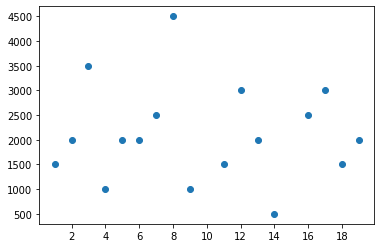

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.xlim(0,20)
#plt.ylim(-1.2, 0.2)
#plt.plot(rs, true_energies,'k')
plt.xticks(np.arange(0, 20, step=2))
plt.scatter(toplot[:,0],toplot[:,1])

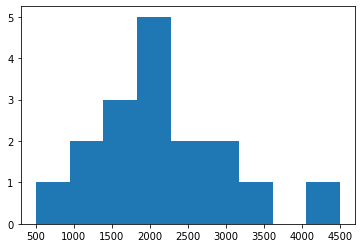

In [25]:
plt.hist(toplot[:,1], bins = 9)
plt.show()